In [15]:
%matplotlib notebook

import math
import random
import time

import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns
import tqdm
import tqdm.tqdm_notebook

ImportError: No module named 'tqdm.tqdm_notebook'

# Summary of Problem

The childless King of Solitaria lives alone in his castle. Overly lonely, the king one day offers one lucky subject the chance to be prince or princess for a day. The loyal subjects leap at the opportunity, having heard tales of the opulent castle and decadent meals that will be lavished upon them. The subjects assemble on the village green, hoping to be chosen.

The winner is chosen through the following game. In the first round, every subject simultaneously chooses a random other subject on the green. (It’s possible, of course, that some subjects will be chosen by more than one other subject.) Everybody chosen is eliminated. (Not killed or anything, just sent back to their hovels.) In each successive round, the subjects who are still in contention simultaneously choose a random remaining subject, and again everybody chosen is eliminated. If there is eventually exactly one subject remaining at the end of a round, he or she wins and heads straight to the castle for fêting. However, it’s also possible that everybody could be eliminated in the last round, in which case nobody wins and the king remains alone. If the kingdom has a population of 56,000 (not including the king), is it more likely that a prince or princess will be crowned or that nobody will win?

*Extra credit: How does the answer change for a kingdom of arbitrary size?*

In [2]:
def point(s, verbose):
    """from the subjects remaining, everyone point at everyone else"""
    gamers = list(s[s.alive].index)
    pointedAt = set()
    for gamer in gamers:
        other = None
        while (other is None) or (other == gamer):
            other = random.choice(gamers)
        pointedAt.add(other)
    s.loc[list(pointedAt), 'alive'] = False
    
    if verbose:
        soldier_boy_tellem(s)

In [3]:
f = None
ax = None
def soldier_boy_tellem(s):
    global f, ax
    if f is None:
        f = plt.figure()
    if ax is None:
        ax = f.add_subplot(111)
        
    # reshape the list into an N * N-ish array
    height, width = best_grid_shape(s.shape[0])
    
    x = s.alive.values.copy().reshape((height, width))
    
    ax = f.add_subplot(111)
    ax.matshow(x)
    f.canvas.draw()
    time.sleep(1)

In [4]:
def best_grid_shape(L):
    """find the best width and height values for a set of L items"""
    x = math.floor(sp.sqrt(L))
    for i in range(x, 0, -1):
        d, r = divmod(L, i)
        if r == 0:
            return i, d

In [5]:
def simulate_game(N, verbose=False):
    subjects = pd.DataFrame([{'alive': True} for i in range(N)])
    
    while subjects.alive.sum() > 1:
        point(subjects, verbose)
    
    return subjects.alive.sum() == 1

<IPython.core.display.Javascript object>


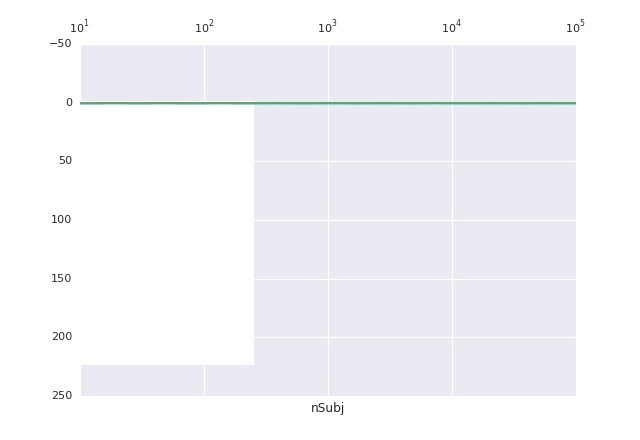

True

In [6]:
simulate_game(56000, True)

In [7]:
x = sp.logspace(1, 5, 40).round().astype(int)

In [8]:
random.seed(1334)
numSubjects = sp.logspace(1, 5, 40).round().astype(int)
numSimuls = 7500

x = pd.DataFrame([
    {
        'nSubj': nSubj,
        'nSim': nSim,
        'someone_won': simulate_game(nSubj)
    }
    for nSubj in tqdm.tqdm(numSubjects, desc='number of subjects loop')
    for nSim in tqdm.trange(numSimuls, desc='number of simulations loop')
])

100%|██████████| 7500/7500 [1:04:54<00:00,  1.91it/s]


In [9]:
x.groupby('nSubj').someone_won.agg(['mean', 'std'])

,mean,std
nSubj,,
10,0.545467,0.497962
13,0.530000,0.499132
16,0.477467,0.499525
20,0.464000,0.498736
26,0.521867,0.499555
33,0.532667,0.498965
41,0.489200,0.499917
52,0.471733,0.499234
66,0.506400,0.499992


In [10]:
x.head()

,nSim,nSubj,someone_won
0,0,10,False
1,1,10,False
2,2,10,False
3,3,10,False
4,4,10,False


<IPython.core.display.Javascript object>


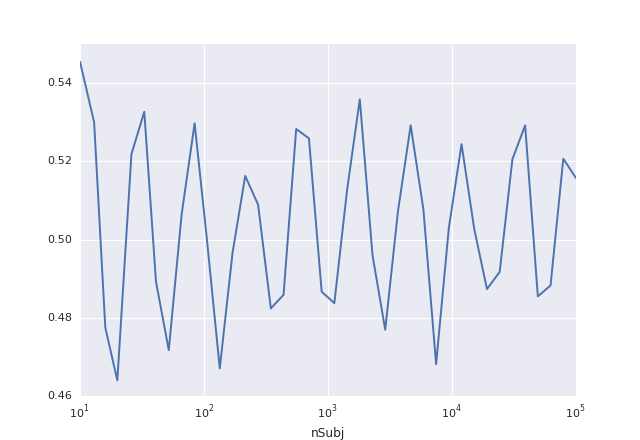

In [13]:
meanAtNSubj = x.groupby('nSubj').someone_won.mean()
meanAtNSubj.plot(logx=True)
plt.show()

In [14]:
random.seed(1334)
numSimuls = 50000

x2 = pd.DataFrame([
    {
        'nSim': nSim,
        'someone_won': simulate_game(1000)
    }
    for nSim in tqdm.trange(numSimuls)
])

  1%|▏         | 704/50000 [00:09<11:05, 74.10it/s]

KeyboardInterrupt: 

In [24]:
x2.someone_won.mean()

0.47511999999999999